# BP神经网络

## (1)导入工具包

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## (2)读取文件数据

In [36]:
df = pd.read_csv(r"E:\学业\BP+RF\kc_house_data.csv")
df.head(50)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## (3)EDA(探索性数据分析)

In [37]:
df.keys()  #查看数据组成信息

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
df.isnull().sum()#查看数据空值信息

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [39]:
df.describe().transpose()# 查看各列数据详细信息，包括count：非空值的数量、平均值、标准差、最小值、第一个四分位数（下四分位数）等

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\yanch\AppData\Local\Temp\ipykernel_7212\176379361.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])#价格分布图
C:\Users\yanch\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

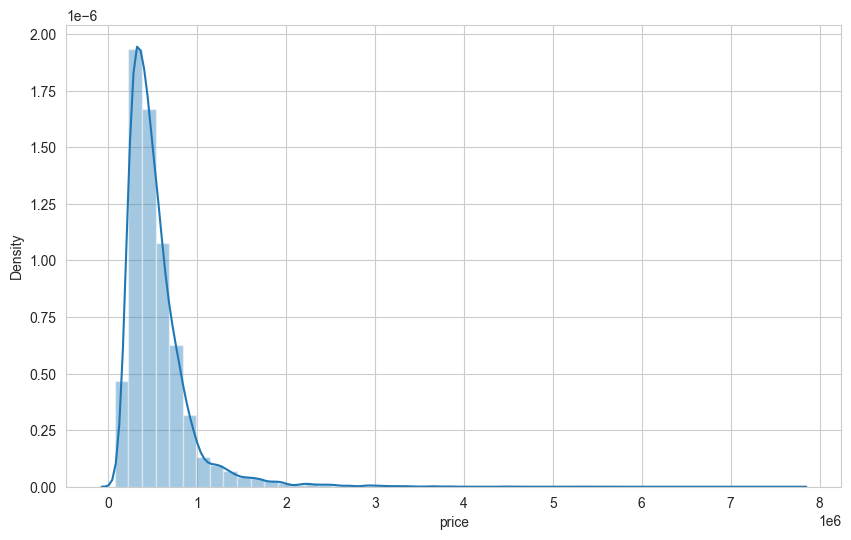

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])#价格分布图

<Axes: xlabel='price', ylabel='sqft_living'>

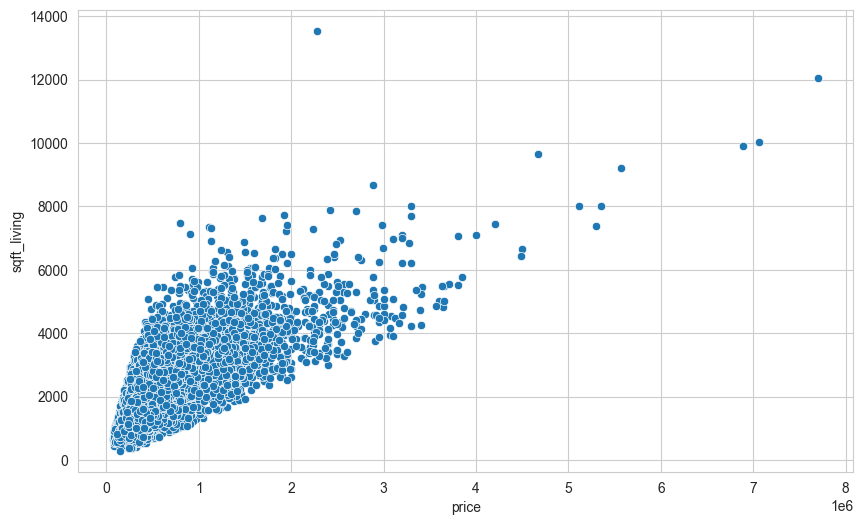

In [7]:
#sqft_living与价格之间的关系
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='price', ylabel='long'>

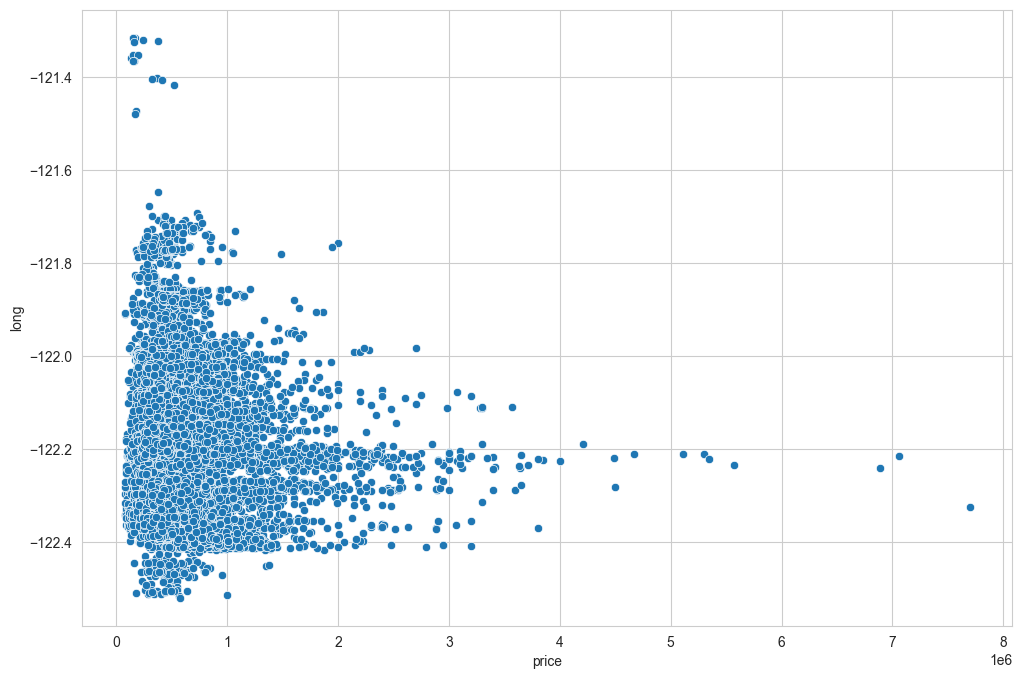

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)

<Axes: xlabel='price', ylabel='lat'>

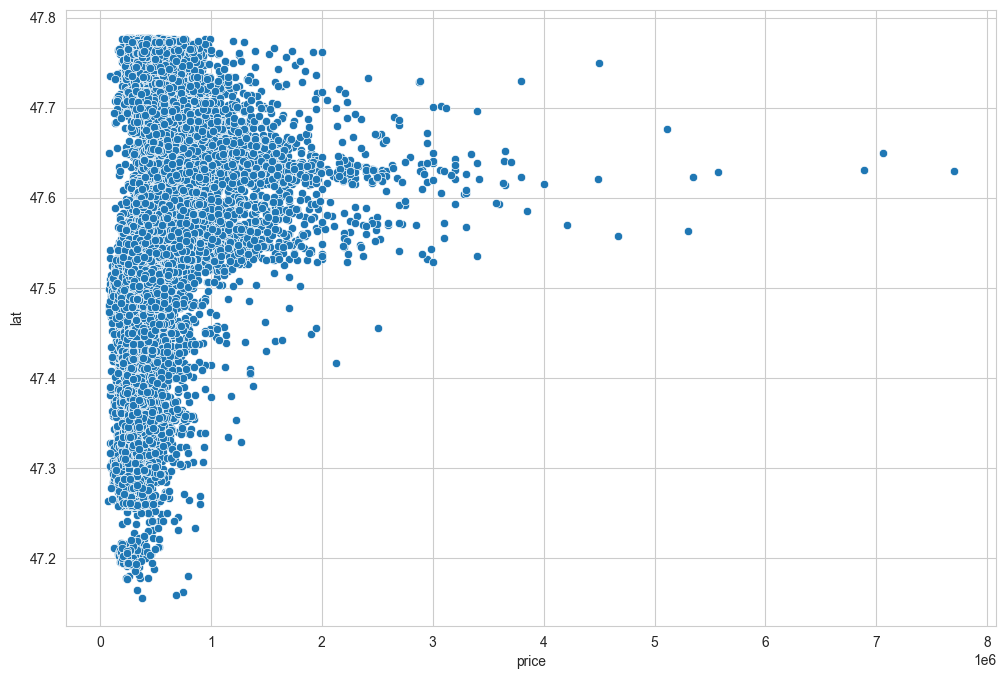

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)

<Axes: xlabel='long', ylabel='lat'>

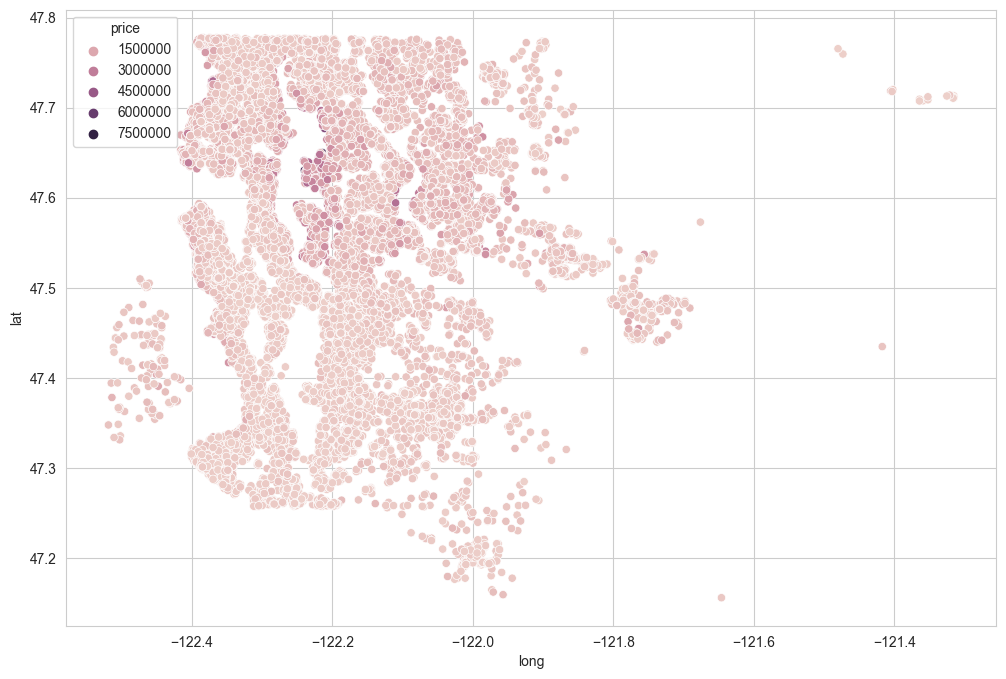

In [10]:
#价格在空间上的分布变化图
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', hue='price', data=df)

In [11]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [12]:
len(df)*(0.01)

216.13

In [13]:
bottom_99_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

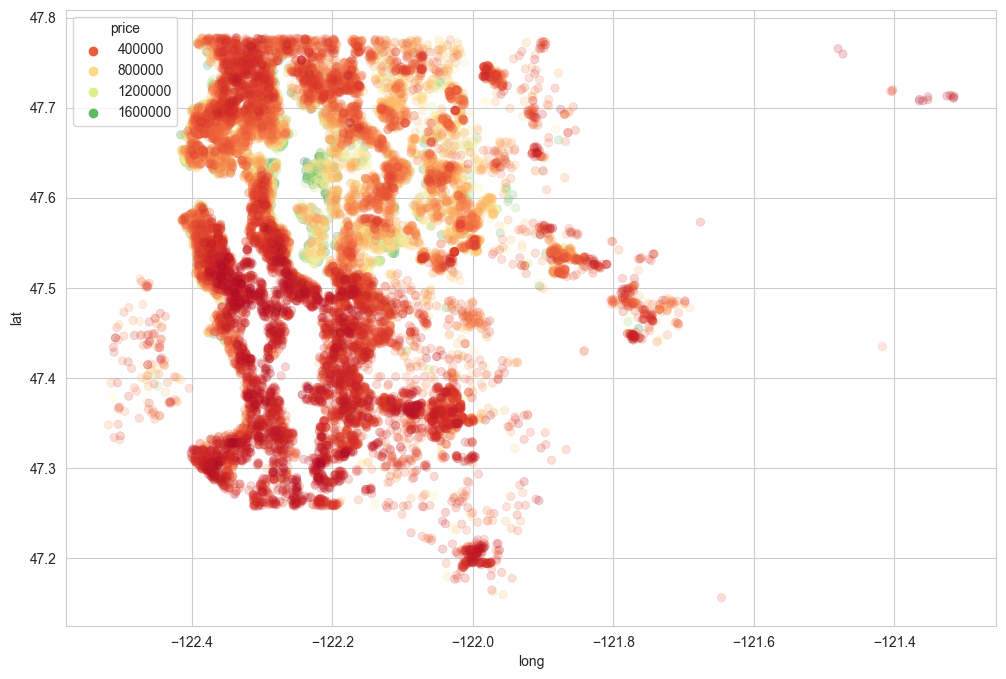

In [14]:
#去除前百分之一的高价，保留剩下的前99%的数据
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=bottom_99_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

<Axes: xlabel='waterfront', ylabel='price'>

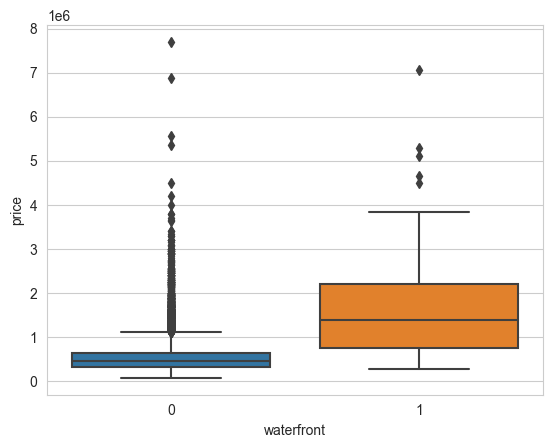

In [15]:
#房价与waterfront的关系
sns.boxplot(x='waterfront',y='price',data=df)

In [16]:
#去除id列
df = df.drop('id', axis=1)
#数据格式转换
df['date'] = pd.to_datetime(df['date'])
#提取年月
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date:date.month)

<Axes: xlabel='month', ylabel='price'>

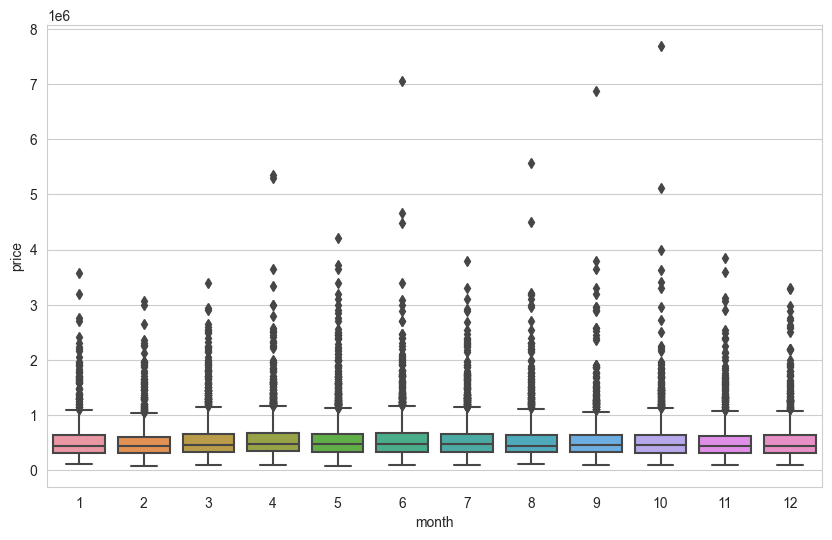

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

<Axes: xlabel='month'>

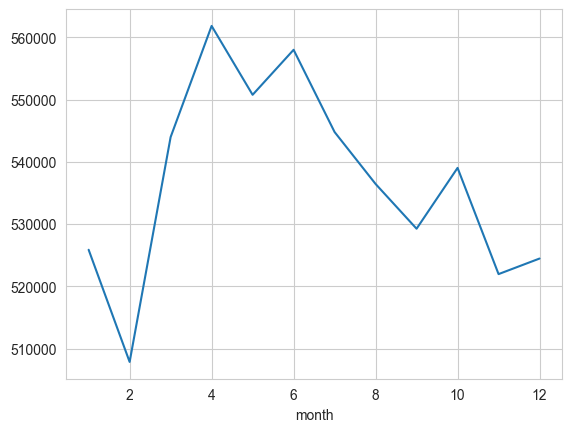

In [18]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

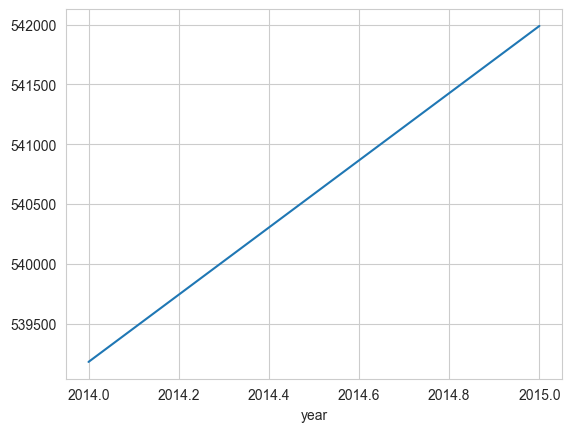

In [19]:
df.groupby('year').mean()['price'].plot()

[Text(0.5, 0, 'Bathrooms'), Text(0, 0.5, 'Price')]

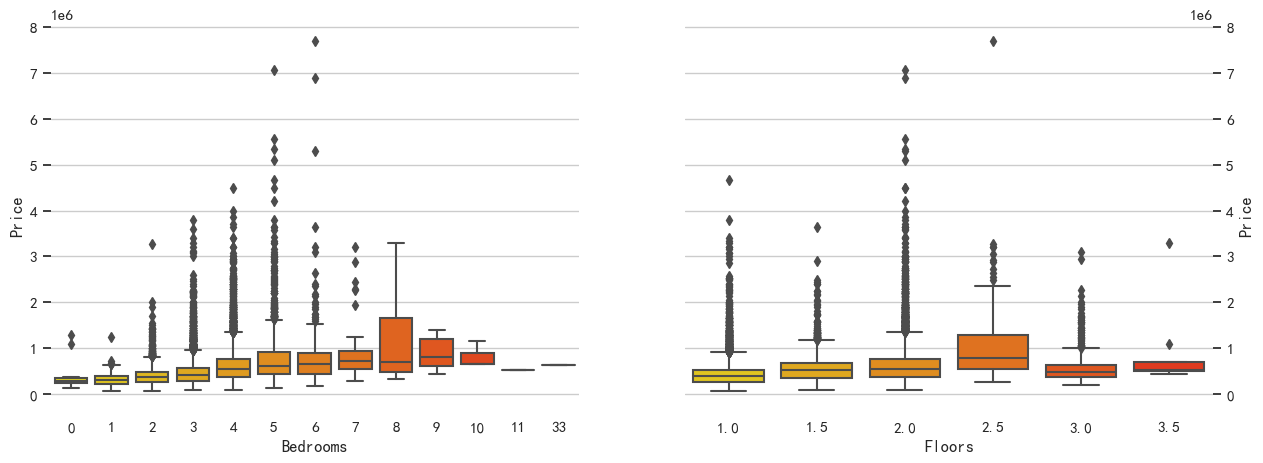

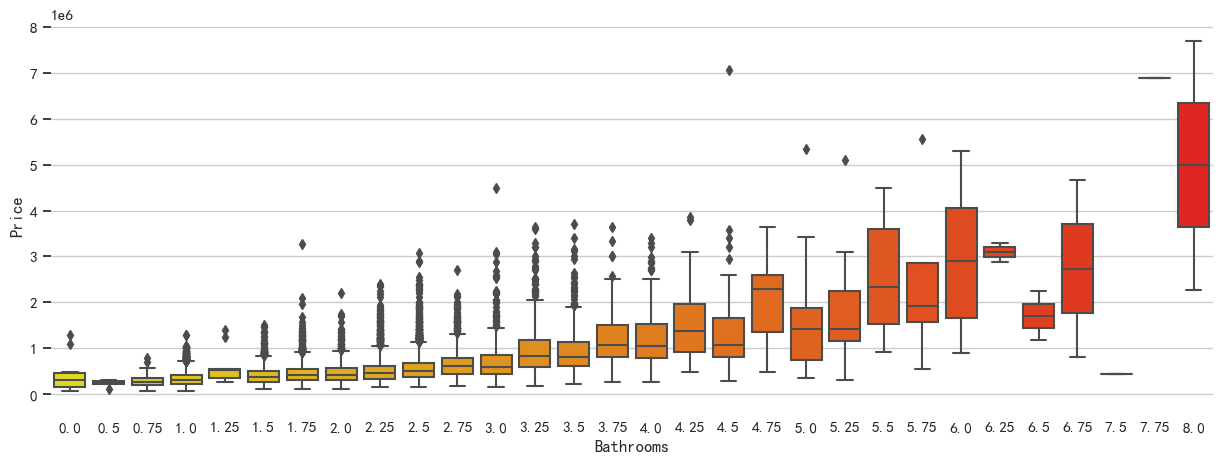

In [42]:
'''
下面代码展示了不同Bedrooms, Floors and Bathrooms的价格分布(箱型图)
'''
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0], palette = 'autumn_r')
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1], palette = 'autumn_r')
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe, palette = 'autumn_r')
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price')

In [20]:
df = df.drop('date', axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [21]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [22]:
df = df.drop('zipcode',axis=1)
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [23]:
df['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [24]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

## (4)构建数据集

In [25]:
X = df.drop('price',axis=1).values
y = df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape
(15129, 19)
X_test.shape

(6484, 19)

## (5)随机森林

训练集 R^2: 0.981246253775293
测试集 R^2: 0.876695787372492
训练集 MSE: 2483349151.0253634
测试集 MSE: 17296486323.1681


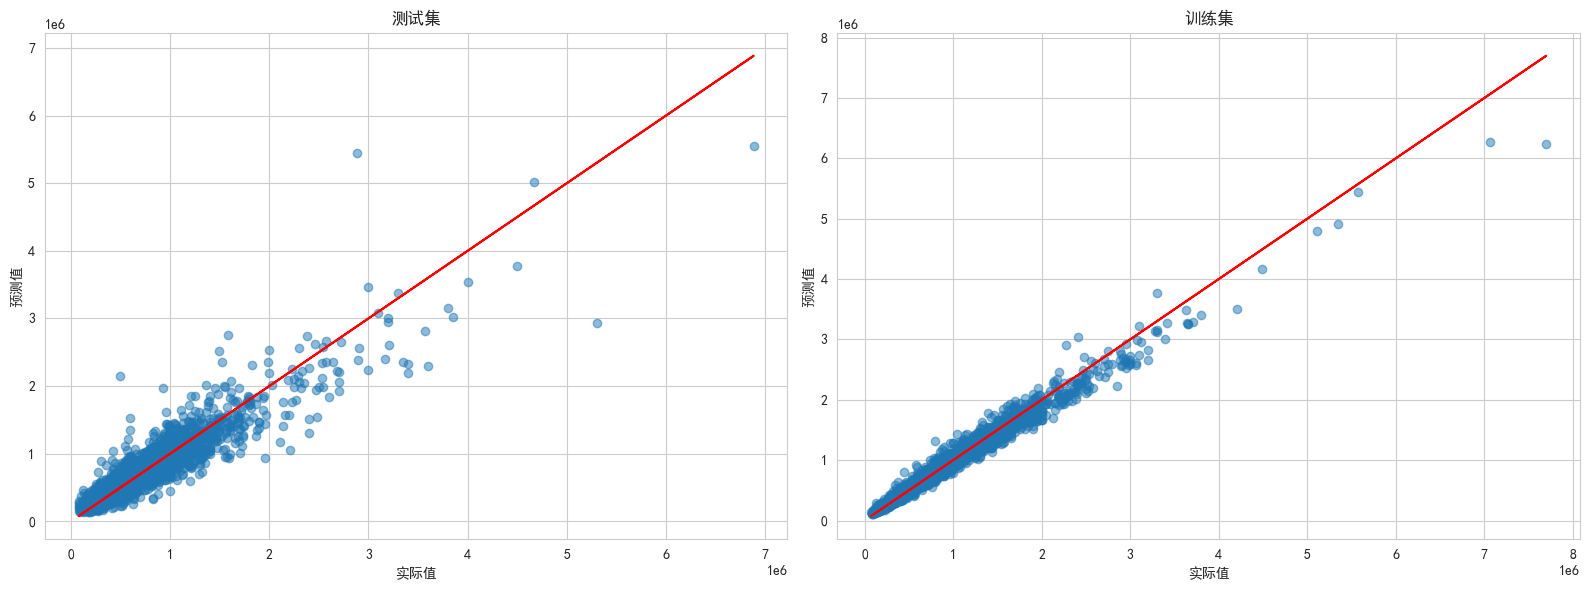

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 创建随机森林回归模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 进行预测
predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

# 计算训练集和测试集的 R²
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, predictions)

print(f"训练集 R^2: {train_r2}")
print(f"测试集 R^2: {test_r2}")

# 计算训练集和测试集的 MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, predictions)

print(f"训练集 MSE: {train_mse}")
print(f"测试集 MSE: {test_mse}")

# 可视化：测试集 vs 预测
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体

# 测试集的实际值 vs 预测值
axs[0].scatter(y_test, predictions, alpha=0.5)
axs[0].plot(y_test, y_test, 'r')  # 画出y=x的直线
axs[0].set_title('测试集')
axs[0].set_xlabel('实际值')
axs[0].set_ylabel('预测值')

# 训练集的实际值 vs 预测值
axs[1].scatter(y_train, train_predictions, alpha=0.5)
axs[1].plot(y_train, y_train, 'r')  # 画出y=x的直线
axs[1].set_title('训练集')
axs[1].set_xlabel('实际值')
axs[1].set_ylabel('预测值')

plt.tight_layout()
plt.show()

